<a href="https://colab.research.google.com/github/dpnolan/covid19model/blob/master/CmdStanPy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install package CmdStanPy
!pip install --upgrade cmdstanpy

In [35]:
# Load packages used in this notebook
import os
import json
import shutil
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import arviz as az

In [36]:
# Install pre-built CmdStan binary
# (faster than compiling from source via install_cmdstan() function)
tgz_file = 'colab-cmdstan-2.23.0.tar.gz'
tgz_url = 'https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz'
if not os.path.exists(tgz_file):
    urllib.request.urlretrieve(tgz_url, tgz_file)
    shutil.unpack_archive(tgz_file)

In [37]:
# Specify CmdStan location via environment variable
os.environ['CMDSTAN'] = '/content/cmdstan-2.23.0'
# Check CmdStan path
from cmdstanpy import CmdStanModel, cmdstan_path
cmdstan_path()

'/content/cmdstan-2.23.0'

In [40]:
bernoulli_stan = os.path.join(cmdstan_path(), 'examples', 'bernoulli', 'bernoulli.stan')
with open(bernoulli_stan, 'r') as fd:
        print('\n'.join(fd.read().splitlines()))

data { 
  int<lower=0> N; 
  array[N] int<lower=0,upper=1> y;

} 
parameters {
  real<lower=0,upper=1> theta;
} 
model {
  theta ~ beta(1,1);  // uniform prior on interval 0,1
  y ~ bernoulli(theta);
}


In [41]:
bernoulli_data = os.path.join(cmdstan_path(), 'examples', 'bernoulli', 'bernoulli.data.json')
with open(bernoulli_data, 'r') as fd:
        print('\n'.join(fd.read().splitlines()))

{
    "N" : 10,
    "y" : [0,1,0,0,0,0,0,0,0,1]
}


In [42]:
print(os.getcwd())
print(os.listdir())

os.chdir("/content/cmdstan-2.23.0/examples/bernoulli")
#os.chdir("/content/")

print(os.getcwd())
print(os.listdir())

/content/WSL
['case_data_IRL_20201111.csv', 'sir_prior4.stan', 'sir4.py', 'sir_prior4', 'influenza_england_1978_school.csv', 'colab-cmdstan-2.23.0.tar.gz', 'C:\\Users\\GGMachines_Gaming\\Documents\\COVID\\WSL_backup\\school_summary.csv', 'sir_incidence2.stan', 'school_summary.csv', 'cmdstan-2.23.0']
/content/cmdstan-2.23.0/examples/bernoulli
['bernoulli.d', 'bernoulli.data.R', 'bernoulli', '.gitignore', 'bernoulli.stan', 'bernoulli.o', '.ipynb_checkpoints', 'bernoulli.data.json']


In [43]:
# Install/upgrade CmdStanPy
!pip -q install -U cmdstanpy

# Install a recent CmdStan (downloads & builds under ~/.cmdstan)
from cmdstanpy import install_cmdstan, set_cmdstan_path, cmdstan_path, cmdstan_version
import os

# Ensure no stale hardcoded path is set
os.environ.pop("CMDSTAN", None)

# Install a modern CmdStan (omit version= to get latest)
install_cmdstan(version="2.35.0")

# Point CmdStanPy at the new install
set_cmdstan_path(cmdstan_path())

# Sanity check
import cmdstanpy
print("CmdStanPy:", cmdstanpy.__version__)
print("CmdStan:", cmdstan_version(), "at", cmdstan_path())



CmdStan install directory: /root/.cmdstan
CmdStan version 2.35.0 already installed
Test model compilation
CmdStanPy: 1.3.0
CmdStan: (2, 35) at /root/.cmdstan/cmdstan-2.35.0


In [44]:
# Run CmdStanPy Hello, World! example
from cmdstanpy import cmdstan_path, CmdStanModel

# Compile example model bernoulli.stan
bernoulli_model = CmdStanModel(stan_file=bernoulli_stan)

# Condition on example data bernoulli.data.json
bern_fit = bernoulli_model.sample(data=bernoulli_data, seed=123)

# Print a summary of the posterior sample
bern_fit.summary()



chain 1:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

chain 2:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

chain 3:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

chain 4:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-7.295900,0.019504,0.805431,-8.825840,-7.005880,-6.750600,1705.28,13864.10,1.00062
theta,0.257094,0.003555,0.124199,0.079213,0.242757,0.485756,1220.34,9921.43,1.00166


##School Example

In [46]:
print(os.getcwd())
print(os.listdir())

os.chdir("/content/WSL/")
#os.chdir("/content/")

# Verify
print(os.getcwd())
print(os.listdir())

/content/WSL
['case_data_IRL_20201111.csv', 'sir_prior4.stan', 'sir4.py', 'sir_negbin.stan', 'sir_prior4', 'influenza_england_1978_school.csv', 'colab-cmdstan-2.23.0.tar.gz', 'C:\\Users\\GGMachines_Gaming\\Documents\\COVID\\WSL_backup\\school_summary.csv', 'sir_incidence2.stan', 'school_summary.csv', 'cmdstan-2.23.0']
/content/WSL
['case_data_IRL_20201111.csv', 'sir_prior4.stan', 'sir4.py', 'sir_negbin.stan', 'sir_prior4', 'influenza_england_1978_school.csv', 'colab-cmdstan-2.23.0.tar.gz', 'C:\\Users\\GGMachines_Gaming\\Documents\\COVID\\WSL_backup\\school_summary.csv', 'sir_incidence2.stan', 'school_summary.csv', 'cmdstan-2.23.0']


In [89]:
csv_path = Path("influenza_england_1978_school.csv")
stan_path = Path("sir_negbin2.stan")

In [90]:
df = pd.read_csv(csv_path)

In [49]:
cases = df["in_bed"].astype(int).to_numpy()
n_days = len(cases)

In [50]:
# --- Time axis used by Stan ODE block ---
t0 = 0.0
# Typical choice: one time unit per row. Stan expects strictly increasing ts:
ts = np.arange(1, n_days + 1, dtype=float)


In [51]:
# --- Population size (N) and initial state y0 ---
N = 763

# Initial conditions [S0, I0, R0]; common choice starts with 1 infected, 0 recovered.
y0 = np.array([N - 1, 1, 0], dtype=float)


In [52]:
# --- Build Stan data list (must match the Stan file's data block) ---
stan_data = {
    "n_days": int(n_days),
    "y0": y0.astype(float),
    "t0": float(t0),
    "ts": ts.astype(float),
    "N": int(N),
    "cases": cases.astype(int),
}


In [108]:
model = CmdStanModel(stan_file="sir_negbin2.stan", compile="stan --build=make TBB=true")
fit = model.sample(data=stan_data, seed=123, adapt_delta=0.8)
fit.summary()

If you wish to force recompilation, use force_compile=True instead.
--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=sir_negbin2.stan --o=/content/WSL/sir_negbin2.hpp /content/WSL/sir_negbin2.stan
Warning in 'sir_negbin2.stan', line 56, column 8: integrate_ode_rk45 is
    deprecated and will be removed in Stan 3.0. Use ode_rk45 instead. 
    The new interface is slightly different, see:
    https://mc-stan.org/users/documentation/case-studies/convert_odes.html

--- Compiling C++ code ---
g++ -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attri

chain 1:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

chain 2:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

chain 3:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

chain 4:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

Exception: neg_binomial_2_lpmf: Location parameter[11] is -3.02364e-07, but must be positive finite! (in 'sir_negbin2.stan', line 66, column 2 to column 52)
	Exception: integrate_ode_rk45: ode parameters and data[1] is inf, but must be finite! (in 'sir_negbin2.stan', line 56, column 4 to column 61)
	Exception: integrate_ode_rk45: ode parameters and data[1] is inf, but must be finite! (in 'sir_negbin2.stan', line 56, column 4 to column 61)
	Exception: neg_binomial_2_lpmf: Location parameter[1] is -nan, but must be positive finite! (in 'sir_negbin2.stan', line 66, column 2 to column 52)
	Exception: neg_binomial_2_lpmf: Location parameter[1] is -nan, but must be positive finite! (in 'sir_negbin2.stan', line 66, column 2 to column 52)
	Exception: neg_binomial_2_lpmf: Location parameter[1] is -nan, but must be positive finite! (in 'sir_negbin2.stan', line 66, column 2 to column 52)
	Exception: integrate_ode_rk45: ode parameters and data[1] is inf, but must be finite! (in 'sir_negbin2.stan',

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-65.414700,0.034036,1.280870,-67.898600,-65.079000,-64.021600,1416.23,161.118,1.002910
gamma,0.541613,0.000945,0.045223,0.471846,0.539169,0.618366,2292.46,260.803,1.001130
beta,1.733710,0.001005,0.051496,1.654820,1.732700,1.820100,2627.30,298.897,0.999439
phi_inv,0.135059,0.001556,0.073231,0.050385,0.117592,0.276961,2216.35,252.144,1.000730
"y[1,1]",758.679000,0.003987,0.203929,758.319000,758.696000,758.982000,2616.35,297.651,1.000040
...,...,...,...,...,...,...,...,...,...
pred_cases[10],87.678000,0.559680,34.825100,40.000000,84.000000,148.000000,3871.73,440.470,0.999558
pred_cases[11],57.079500,0.401556,24.358200,24.000000,54.000000,101.000000,3679.60,418.612,1.000780
pred_cases[12],37.461700,0.279786,16.605700,15.000000,35.000000,67.000000,3522.59,400.749,1.000250
pred_cases[13],23.476500,0.179323,10.912400,9.000000,22.000000,43.000000,3703.11,421.286,0.999440


In [159]:
model = CmdStanModel(stan_file="sir_negbin2_log2.stan")
fit = model.sample(data=stan_data, seed=123, adapt_delta=0.8)

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=sir_negbin2_log2.stan --o=/content/WSL/sir_negbin2_log2.hpp /content/WSL/sir_negbin2_log2.stan
Warning in 'sir_negbin2_log2.stan', line 56, column 8: integrate_ode_rk45 is
    deprecated and will be removed in Stan 3.0. Use ode_rk45 instead. 
    The new interface is slightly different, see:
    https://mc-stan.org/users/documentation/case-studies/convert_odes.html

--- Compiling C++ code ---
g++ -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /content/WSL/sir_negbin2_log2.

chain 1:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

chain 2:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

chain 3:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

chain 4:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

Exception: neg_binomial_2_lpmf: Location parameter[11] is -3.02364e-07, but must be positive finite! (in 'sir_negbin2_log2.stan', line 66, column 2 to column 52)
	Exception: integrate_ode_rk45: ode parameters and data[1] is inf, but must be finite! (in 'sir_negbin2_log2.stan', line 56, column 4 to column 61)
	Exception: integrate_ode_rk45: ode parameters and data[1] is inf, but must be finite! (in 'sir_negbin2_log2.stan', line 56, column 4 to column 61)
	Exception: neg_binomial_2_lpmf: Location parameter[1] is -nan, but must be positive finite! (in 'sir_negbin2_log2.stan', line 66, column 2 to column 52)
	Exception: neg_binomial_2_lpmf: Location parameter[1] is -nan, but must be positive finite! (in 'sir_negbin2_log2.stan', line 66, column 2 to column 52)
	Exception: neg_binomial_2_lpmf: Location parameter[1] is -nan, but must be positive finite! (in 'sir_negbin2_log2.stan', line 66, column 2 to column 52)
	Exception: integrate_ode_rk45: ode parameters and data[1] is inf, but must be f

In [160]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-65.414700,0.034036,1.280870,-67.898600,-65.079000,-64.021600,1416.23,169.527,1.002910
gamma,0.541613,0.000945,0.045223,0.471846,0.539169,0.618366,2292.46,274.415,1.001130
beta,1.733710,0.001005,0.051496,1.654820,1.732700,1.820100,2627.30,314.496,0.999439
phi_inv,0.135059,0.001556,0.073231,0.050385,0.117592,0.276961,2216.35,265.304,1.000730
"y[1,1]",758.679000,0.003987,0.203929,758.319000,758.696000,758.982000,2616.35,313.185,1.000040
...,...,...,...,...,...,...,...,...,...
log_lik[9],-5.935500,0.007192,0.419875,-6.715960,-5.874410,-5.364230,3408.14,407.965,1.000420
log_lik[10],-5.573130,0.008355,0.490838,-6.505100,-5.494180,-4.917680,3451.62,413.170,1.000170
log_lik[11],-4.369100,0.006949,0.321701,-4.947660,-4.334580,-3.910480,2143.07,256.532,1.000780
log_lik[12],-3.638720,0.005790,0.284720,-4.139400,-3.598710,-3.252220,2418.48,289.500,1.000420


In [127]:
school_summary=pd.dataframe=fit.summary().copy(deep=True)

In [128]:
school_summary

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-65.414700,0.034036,1.280870,-67.898600,-65.079000,-64.021600,1416.23,176.719,1.002910
gamma,0.541613,0.000945,0.045223,0.471846,0.539169,0.618366,2292.46,286.057,1.001130
beta,1.733710,0.001005,0.051496,1.654820,1.732700,1.820100,2627.30,327.839,0.999439
phi_inv,0.135059,0.001556,0.073231,0.050385,0.117592,0.276961,2216.35,276.560,1.000730
"y[1,1]",758.679000,0.003987,0.203929,758.319000,758.696000,758.982000,2616.35,326.472,1.000040
...,...,...,...,...,...,...,...,...,...
pred_cases[10],87.678000,0.559680,34.825100,40.000000,84.000000,148.000000,3871.73,483.121,0.999558
pred_cases[11],57.079500,0.401556,24.358200,24.000000,54.000000,101.000000,3679.60,459.146,1.000780
pred_cases[12],37.461700,0.279786,16.605700,15.000000,35.000000,67.000000,3522.59,439.554,1.000250
pred_cases[13],23.476500,0.179323,10.912400,9.000000,22.000000,43.000000,3703.11,462.079,0.999440


In [129]:
!pwd

/content/WSL


In [130]:
school_summary.to_csv("school_summary.csv", index=True)

In [161]:
idata = az.from_cmdstanpy(posterior=fit)

# Summary incl. mean, sd, mcse, r_hat, ess_bulk/tail
print(az.summary(idata, var_names=["beta","gamma","R0"], round_to=3))

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
beta   1.734  0.051   1.641    1.835      0.001    0.001  2707.663  2100.855   
gamma  0.542  0.045   0.462    0.631      0.001    0.001  2420.383  1890.316   
R0     3.222  0.268   2.757    3.747      0.005    0.005  2586.494  2294.570   

       r_hat  
beta   1.001  
gamma  1.003  
R0     1.001  


In [162]:
# Convert your CmdStanPy fit to InferenceData
idata = az.from_cmdstanpy(posterior=fit)

# See what sampler stats are present
print("sample_stats vars:", list(idata.sample_stats.data_vars))

# Divergences
div = idata.sample_stats["diverging"]
n_div = int(div.sum())
print("Divergences:", n_div)

# Tree depth (ArviZ name is 'tree_depth')
if "tree_depth" in idata.sample_stats:
    td = idata.sample_stats["tree_depth"]
    max_td = int(td.max())
    n_max_td = int((td == max_td).sum())
    print(f"Hits at max tree depth ({max_td}):", n_max_td)
else:
    print("No 'tree_depth' in sample_stats (backend/version mismatch?).")

# BFMI (energy diagnostic; <~0.3 can be concerning)
bfmi_values = az.bfmi(idata)
if np.isscalar(bfmi_values):
    print("BFMI:", float(bfmi_values))
else:
    print("Mean BFMI:", float(np.mean(bfmi_values)))

# Step size & acceptance rate
if "step_size" in idata.sample_stats:
    print("Mean step_size:", float(idata.sample_stats["step_size"].mean()))
else:
    print("No 'step_size' in sample_stats.")

# ArviZ uses 'acceptance_rate' for Stan backends
if "acceptance_rate" in idata.sample_stats:
    print("Mean acceptance_rate:", float(idata.sample_stats["acceptance_rate"].mean()))
else:
    print("No 'acceptance_rate' in sample_stats.")

sample_stats vars: ['acceptance_rate', 'diverging', 'energy', 'lp', 'n_steps', 'step_size', 'tree_depth']
Divergences: 0
Hits at max tree depth (3): 1685
Mean BFMI: 1.0277388662290015
Mean step_size: 0.6351452499999638
Mean acceptance_rate: 0.9161297655799999


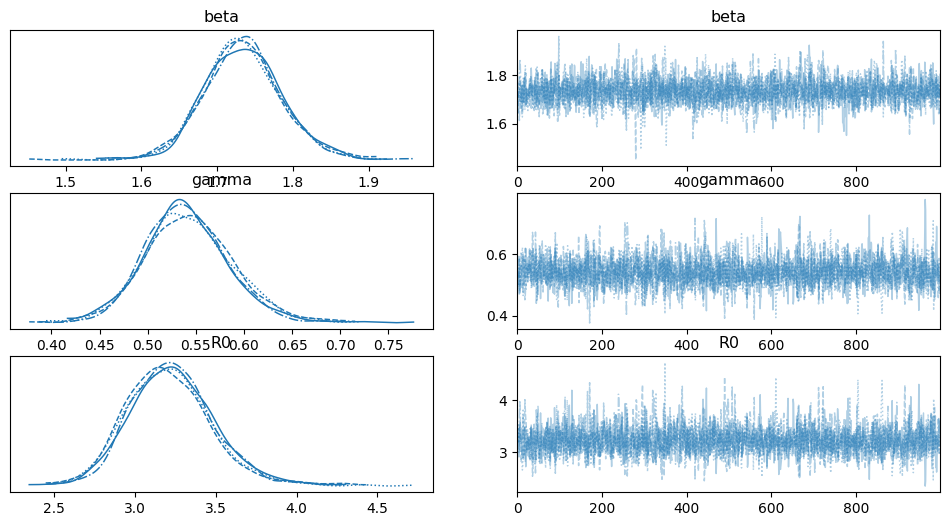

In [163]:
az.plot_trace(idata, var_names=["beta","gamma","R0"]); plt.show()

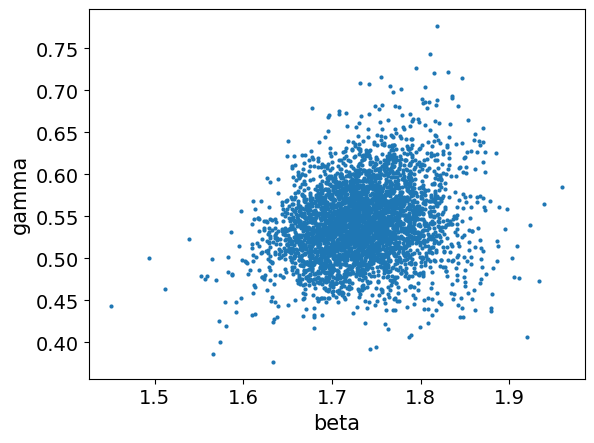

In [164]:
az.plot_pair(idata, var_names=["beta","gamma"], kind="scatter", divergences=True); plt.show()


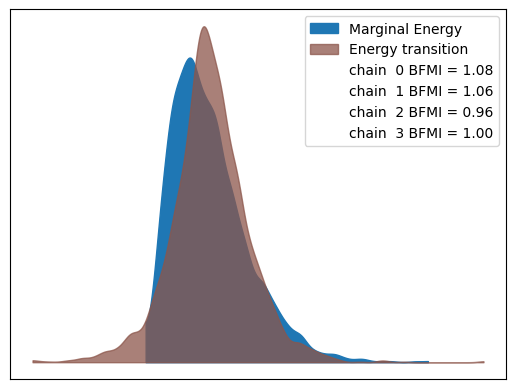

In [165]:
az.plot_energy(idata); plt.show()

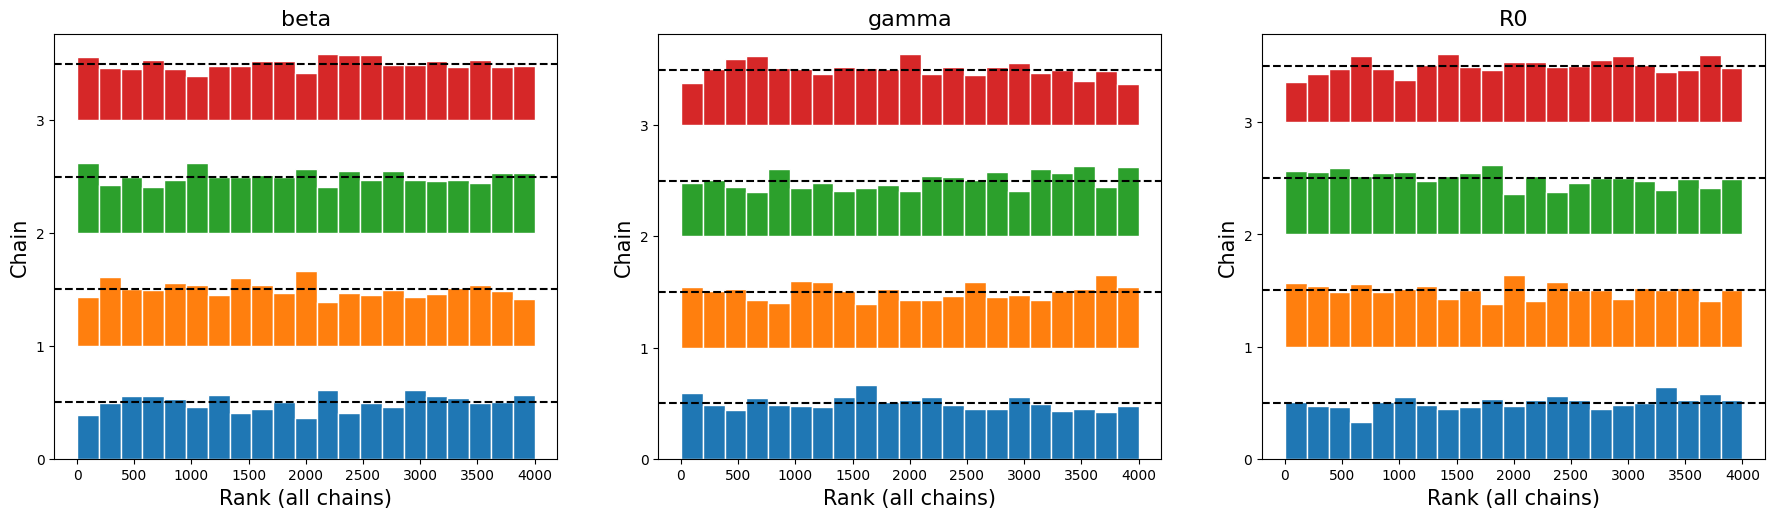

In [166]:
az.plot_rank(idata, var_names=["beta","gamma","R0"]); plt.show()

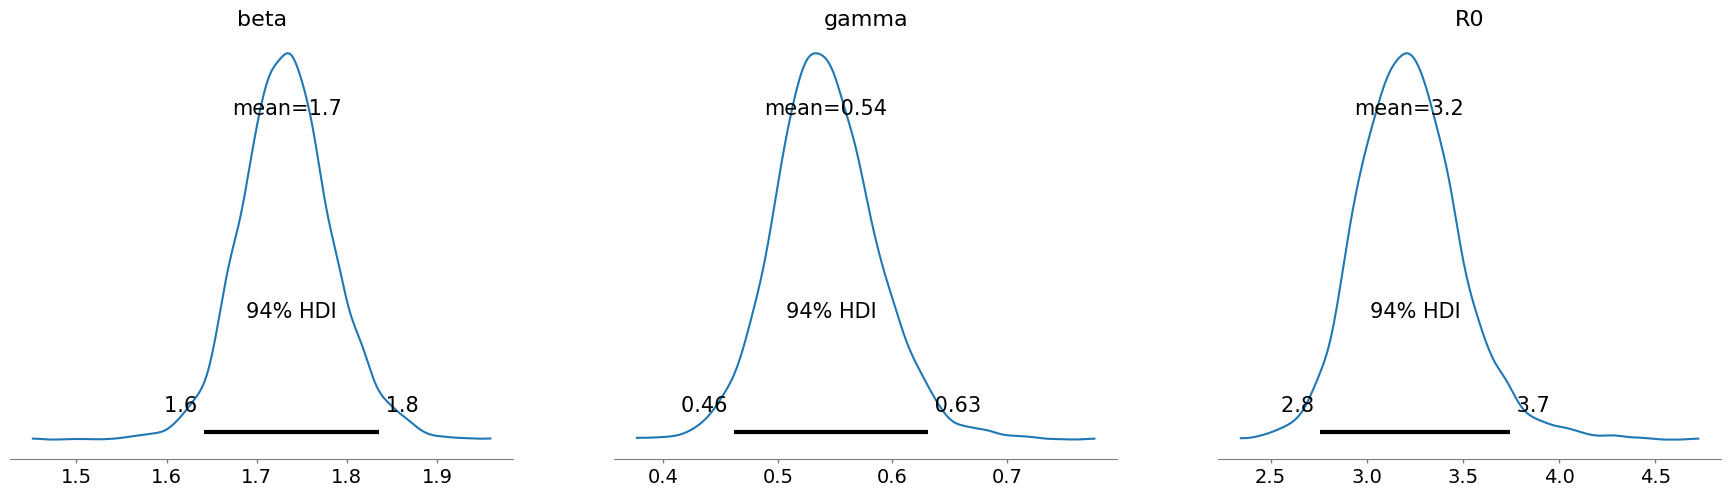

In [167]:
az.plot_posterior(idata, var_names=["beta","gamma","R0"]); plt.show()

In [155]:
fit.diagnose()

'Processing csv files: /tmp/tmp2hioa3zt/sir_negbin2_logzg64a_aq/sir_negbin2_log-20251106212449_1.csv, /tmp/tmp2hioa3zt/sir_negbin2_logzg64a_aq/sir_negbin2_log-20251106212449_2.csv, /tmp/tmp2hioa3zt/sir_negbin2_logzg64a_aq/sir_negbin2_log-20251106212449_3.csv, /tmp/tmp2hioa3zt/sir_negbin2_logzg64a_aq/sir_negbin2_log-20251106212449_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.\n'

In [139]:
	Mean	MCSE	StdDev	5%	50%	95%	N_Eff	N_Eff/s	R_hat
lp__	-75.687200	0.048067	1.315390	-78.145100	-75.354100	-74.255700	748.891	21.3050	1.003090
gamma	0.277036	0.004136	0.139408	0.074939	0.263449	0.523286	1135.830	32.3128	1.001610
beta	1.099300	0.003900	0.131845	0.901705	1.090680	1.330820	1143.050	32.5182	1.001550
phi_inv	0.529208	0.004726	0.172906	0.300740	0.504369	0.855446	1338.800	38.0871	1.003030
y[1,1]	760.301000	0.005807	0.201275	759.943000	760.312000	760.608000	1201.560	34.1828	1.001400

SyntaxError: invalid syntax (ipython-input-848098670.py, line 1)

In [168]:
# Calculate WAIC
waic = az.waic(idata)
print("\nWAIC:")
print(waic)



WAIC:
Computed from 4000 posterior samples and 13 observations log-likelihood matrix.

          Estimate       SE
elpd_waic   -58.75     4.90
p_waic        1.49        -


In [169]:
# Calculate LOO
loo = az.loo(idata)
print("\nLOO:")
print(loo)


LOO:
Computed from 4000 posterior samples and 13 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   -58.78     4.90
p_loo        1.53        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.70]   (good)       13  100.0%
   (0.70, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%



##IEMAG Model

In [22]:
# --- Paths ---
os.chdir
csv_path = Path("case_data_IRL_20201111.csv")
stan_path = Path("sir_incidence2.stan")

In [24]:
# --- Load data ---
df = pd.read_csv(csv_path)

In [25]:
cases = df["daycount"].astype(int).to_numpy()
n_days = len(cases)

In [26]:
# --- Time axis used by Stan ODE block ---
t0 = 0.0
# Typical choice: one time unit per row. Stan expects strictly increasing ts:
ts = np.arange(1, n_days + 1, dtype=float)

In [27]:
# --- Population size (N)---
N = 5900000

In [28]:
# Initial conditions [S0, I0, R0]; common choice starts with 1 infected, 0 recovered.
y0 = np.array([N - 1, 1, 0], dtype=float)

In [29]:
# --- Build Stan data list (must match the Stan file's data block) ---
stan_data = {
    "n_days": int(n_days),
    "y0": y0.astype(float),
    "t0": float(t0),
    "ts": ts.astype(float),
    "N": int(N),
    "cases": cases.astype(int),
}

In [31]:
model = CmdStanModel(stan_file="sir_incidence2.stan",
                     compile="stan --build=make TBB=true")
fit = model.sample(data=stan_data)# , seed=123)
fit.summary()

If you wish to force recompilation, use force_compile=True instead.


chain 1:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

chain 2:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

chain 3:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

chain 4:   0%|          | 0/2000 [00:00<?, ?it/s, (Warmup)]

Exception: neg_binomial_2_lpmf: Location parameter[9] is -2.54251e-07, but must be positive finite! (in 'sir_incidence2.stan', line 60, column 2 to column 55)
	Exception: integrate_ode_rk45: ode parameters and data[2] is inf, but must be finite! (in 'sir_incidence2.stan', line 46, column 4 to column 61)
	Exception: integrate_ode_rk45: ode parameters and data[2] is inf, but must be finite! (in 'sir_incidence2.stan', line 46, column 4 to column 61)
	Exception: integrate_ode_rk45: ode parameters and data[2] is inf, but must be finite! (in 'sir_incidence2.stan', line 46, column 4 to column 61)
	Exception: integrate_ode_rk45: ode parameters and data[2] is inf, but must be finite! (in 'sir_incidence2.stan', line 46, column 4 to column 61)
	Exception: integrate_ode_rk45: ode parameters and data[2] is inf, but must be finite! (in 'sir_incidence2.stan', line 46, column 4 to column 61)
	Exception: integrate_ode_rk45: ode parameters and data[2] is inf, but must be finite! (in 'sir_incidence2.stan

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-1.970410e+03,24.335700,34.486700,-2.030840e+03,-1.950710e+03,-1.949170e+03,2.00823,0.001154,28.63370
gamma,3.196760e+00,1.290650,1.844080,3.651900e-02,4.110740e+00,4.720300e+00,2.04146,0.001173,7.24162
beta,3.270530e+00,1.257190,1.796950,1.921010e-01,4.157690e+00,4.765050e+00,2.04303,0.001174,7.09002
phi_inv,5.531050e+00,0.667579,0.998551,4.516810e+00,5.125550e+00,7.510150e+00,2.23735,0.001285,2.95825
"y[1,1]",5.899993e+06,0.105054,4.698180,5.899990e+06,5.899990e+06,5.900000e+06,2000.00000,1.148920,1.85558
...,...,...,...,...,...,...,...,...,...
pred_cases[249],6.181500e+01,3.773950,148.199000,0.000000e+00,5.000000e+00,3.390000e+02,1542.04000,0.885838,1.00930
pred_cases[250],6.491920e+01,2.968670,169.390000,0.000000e+00,5.000000e+00,3.220000e+02,3255.74000,1.870290,1.00612
pred_cases[251],5.645000e+01,2.444150,133.746000,0.000000e+00,5.000000e+00,2.800000e+02,2994.36000,1.720140,1.00718
pred_cases[252],5.663630e+01,2.323270,142.012000,0.000000e+00,4.000000e+00,3.100000e+02,3736.36000,2.146390,1.00731


In [37]:
fit.diagnose()

'Processing csv files: /tmp/tmpeye8bgto/sir_incidence2nc__fpoh/sir_incidence2-20251104224750_1.csv, /tmp/tmpeye8bgto/sir_incidence2nc__fpoh/sir_incidence2-20251104224750_2.csv, /tmp/tmpeye8bgto/sir_incidence2nc__fpoh/sir_incidence2-20251104224750_3.csv, /tmp/tmpeye8bgto/sir_incidence2nc__fpoh/sir_incidence2-20251104224750_4.csv\n\nChecking sampler transitions treedepth.\n922 of 4000 (23.05%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.\nTrajectories that are prematurely terminated due to this limit will result in slow exploration.\nFor optimal performance, increase this limit.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nThe E-BFMI, 0.01, is below the nominal threshold of 0.30 which suggests that HMC may have trouble exploring the target distribution.\nIf possible, try to reparameterize the model.\n\nThe following parameters had fewer than 0.001 effective d

In [ ]:
# as below, with tree depth increased to 20
# very high rhat don't look good
	Mean	MCSE	StdDev	5%	50%	95%	N_Eff	N_Eff/s	R_hat
lp__	-1.990300e+03	28.118600	39.84050	-2.031720e+03	-1.958860e+03	-1.949260e+03	2.00752	0.001756	34.48230
gamma	2.139090e+00	1.484880	2.11170	3.564630e-02	3.373980e+00	4.611210e+00	2.02247	0.001769	10.69290
beta	2.240260e+00	1.446250	2.05713	1.908440e-01	3.426350e+00	4.654580e+00	2.02320	0.001769	10.46710
phi_inv	6.077930e+00	0.773399	1.14757	4.563950e+00	6.020890e+00	7.694200e+00	2.20166	0.001925	3.20287
y[1,1]

In [ ]:
# with lower nonzero bound on phi inv and uniform distributions
lp__	-1.990310e+03	28.117700	39.83950	-2.031820e+03	-1.958610e+03	-1.949260e+03	2.00756	0.003174	34.42400
gamma	2.134780e+00	1.481780	2.10675	3.559120e-02	3.258040e+00	4.594220e+00	2.02144	0.003196	11.13430
beta	2.235910e+00	1.443180	2.05222	1.906620e-01	3.309780e+00	4.639200e+00	2.02212	0.003197	10.89870
phi_inv	6.061550e+00	0.770915	1.14311	4.547970e+00	6.095520e+00	7.691560e+00	2.19868	0.003476	3.20770
y[1,1]	5.899995e+06	0.111379	4.98100	5.899990e+06	5.900000e+06	5.900000e+06	2000.00000	3.161620	2.65619
...	...	...	...	...	...	...	...	...	...
pred_cases[249]	5.787850e+01	11.553500	148.82700	0.000000e+00	3.000000e+00	3.090000e+02	165.93300	0.262308	1.01704
pred_cases[250]	5.044000e+01	8.503420	126.73500	0.000000e+00	3.000000e+00	2.830000e+02	222.13000	0.351145	1.01502
pred_cases[251]	4.528530e+01	2.938470	113.39700	0.000000e+00	2.000000e+00	2.410000e+02	1489.22000	2.354180	1.01328
pred_cases[252]	4.691780e+01	4.331190	121.48200	0.000000e+00	3.000000e+00	2.510000e+02	786.69300	1.243610	1.01377
pred_cases[253]	4.465150e+01	6.389260	112.98200	0.000000e+00	3.000000e+00	2.390000e+02	312.69000	0.494304	1.01467
1275 rows × 9 columns

In [ ]:
index	Mean	MCSE	StdDev	5%	50%	95%	N_Eff	N_Eff/s	R_hat
lp__	-1950.49	0.0405791	1.2223	-1952.95	-1950.18	-1949.12	907.3	0.423439	1.00404
gamma	4.24313	0.0145886	0.30902	3.75723	4.22564	4.77674	448.691	0.209405	1.01903
beta	4.28953	0.0145114	0.307548	3.80667	4.2719	4.8206	449.167	0.209627	1.01902
phi_inv	4.97812	0.0116236	0.326373	4.43764	4.97099	5.51717	788.403	0.367949	1.01259
y[1,1]	5899991.0	0.105436	2.88355	5899990.0	5899990.0	5900000.0	747.96	0.349074	1.0064

In [40]:
import arviz as az

In [41]:
# Convert both prior and posterior fits
idata = az.from_cmdstanpy(posterior=fit)
idata_prior = az.from_cmdstanpy(prior=fit_prior)

# Rich summary (mean, sd, ESS, R-hat, etc.)
print(az.summary(idata, var_names=["beta","gamma","R0","lp__"], round_to=3))

# R-hat & ESS programmatically
rhat = az.rhat(idata)
ess  = az.ess(idata)
print("Rhat(beta):", float(rhat.to_array().sel(variable="beta")))
print("ESS_bulk(beta):", float(ess.ess_bulk.to_array().sel(variable="beta")))


NameError: name 'fit_prior' is not defined